In [1]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
# https://docs.opencv.org/master/d6/d00/tutorial_py_root.html
class ImageProcessing:
  def __init__(self ,imgLink):
    # Original Image - hình gốc
    self.img = cv.imread(imgLink)
    # Result Image - hình kết quả 
    self.rsImg = self.img
    # Size of matrix - kích thước ma trận
    self.height = len(self.img)
    self.width = len(self.img[0])
    self.r, self.g, self.b = cv.split(self.img)
#     self.path = "save_images"

  def reset(self):
    # print('After Reset:\n')
    self.r, self.g, self.b = cv.split(self.img)
    self.rsImg = self.img
    # print(self.cRGB)

  def toBlackWhite(self):
    t = self.r * 0.299 + self.g * 0.587 + self.b * 0.114
    self.r = self.g = self.b = t
    self.rsImg = cv.merge((self.r,self.b,self.g))
  
  def toYellow(self):
    self.b[:,:] = 255
    self.rsImg = cv.merge((self.r,self.b,self.g))

  def edgeDetection(self):
    # k = np.array([[],[],[]])
    k = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    result = cv.filter2D(self.img,0,k)
    self.rsImg = result

  def kernel(self, kernel = None):
    if kernel is None:
      kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
    result = cv.filter2D(self.img,0,kernel)
    self.rsImg = result

  def sharpen(self):
    k = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    result = cv.filter2D(self.img,-1,k)
    self.rsImg = result

  def morphologyEx(self, mode = None):
    # giải thích:
    # hàm morphology khá giống như phép tính convolution nhưng với 1 kernel có sẵn dựa trên mode
    # k ở dưới ko bk là có tác dụng gì vì hàm cv.getStructuringElement(cv.'mode',(n,n)) n là số lẻ > 0
    # sẽ trả về 1 kernel có kích thước n x n
    if mode is not None:
      k = np.ones((3,3))
      result = cv.morphologyEx(self.img, mode, k)
      self.rsImg = result

  def onCamera(self):
    cap = cv.VideoCapture(0)
    isOn = True
    if not cap.isOpened:
      print("Can't find camera device !")
      isOn = False
    
    while isOn:
      ret, frame = cap.read()
      if not ret:
        print("Something went wrong, can't receive frames !")
        break
      k = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
      # k = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
      # result = cv.filter2D(frame,0,k)
      # k = np.ones((3,3))
      result = cv.morphologyEx(frame, cv.MORPH_GRADIENT, k)
      # show frame ra
      cv.imshow('frame', result)
      if cv.waitKey(1) == 27:
        break

    cap.release()
    cv.destroyAllWindows()

  def testing(self):
    k = np.ones((5,5))
    result = cv.filter2D(self.img,-3,k,delta=2)
    print(result.shape)

  def saveImage(self ,imgName = 'output.jpg'):
    # Tên mặc định của hình là output.jpg
    cv.imwrite(f"{self.path}\\{imgName}", self.rsImg)

  def drawImage(self):
    RBGimg = cv.cvtColor(self.rsImg, cv.COLOR_BGR2RGB)
    plt.imshow(RBGimg)
    plt.show()
    cv.namedWindow("output", cv.WINDOW_NORMAL)        # Create window with freedom of dimensions
    cv.imshow("output",self.rsImg)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

img = ImageProcessing('../girl.jpg')

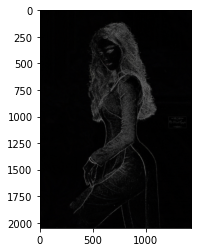

In [2]:
img.edgeDetection()
img.drawImage()